This tutorial is a walk-through for the text preprocessing for Natural Language Processing (NLP) problems. NLP deals with the extraction for the interested information from the raw text. Currently multiple types of business organizations need to handle with huge amount of text data like customers review, tweets,news letters,emails, etc. and get much more information from text with NLP and machine learning.

Text preprocessing is the first step to clean the text data and and to prepare text data before encoding.

 We will use the Amazon Reviews dataset from [Kaggle](https://https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones): Unlocked Mobile Phones dataset in this tutorial

In [3]:
import os

if not os.path.exists('Amazon_Unlocked_Mobile.csv'):
    !gsutil cp gs://pet-detect-239118/text_retrieval/Amazon_Unlocked_Mobile.csv ./Amazon_Unlocked_Mobile.csv

Copying gs://pet-detect-239118/text_retrieval/Amazon_Unlocked_Mobile.csv...
- [1 files][125.8 MiB/125.8 MiB]                                                
Operation completed over 1 objects/125.8 MiB.                                    


Import the dataset & Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
dataset = pd.read_csv('Amazon_Unlocked_Mobile.csv')
dataset.head(3)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0


Handling missing value

In [7]:
dataset.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [9]:
dataset = dataset[['Rating', 'Reviews']]
dataset.dropna(inplace=True)
dataset.isna().sum()

Rating     0
Reviews    0
dtype: int64

Subset the columns that we are interested in

We want to use the text to predict if the review is positive (for 4 & 5 Rating), negative (for 1 & 2 Rating), or neutral(for 3 Rating)

In [10]:
def addLabel(rating):
  if rating >=4:
    return 'Positive'
  if rating <=2:
    return 'Negative'
  else:
    return 'Neutral'

In [11]:
dataset['Label'] = dataset['Rating'].apply(addLabel)

In [13]:
dataset.head(8)

,Rating,Reviews,Label
0,5,I feel so LUCKY to have found this used (phone...,Positive
1,4,"nice phone, nice up grade from my pantach revu...",Positive
2,5,Very pleased,Positive
3,4,It works good but it goes slow sometimes but i...,Positive
4,4,Great phone to replace my lost phone. The only...,Positive
5,1,I already had a phone with problems... I know ...,Negative
6,2,The charging port was loose. I got that solder...,Negative
7,2,"Phone looks good but wouldn't stay charged, ha...",Negative


**Data Cleaning And Text Preprocessing**

I. Removing URL.

II. Removing all irrelevant characters (Numbers and Punctuation).

III. Convert all characters into lowercase.

IV. Tokenization

V. Removing Stopwords

VI. Stemming and Lemmatization

VII. Remove the words having length <= 2

VIII. Convert the list of tokens into back to the string

In [54]:
dataset['Reviews'].iloc[2430]

"What a steal at $250! This phone definitely holds its own against the 2015 Flagship phones.View some sample pictures from the rear camera. You can see daylight pictures are nice but low-light pictures are noisy.Pros:Price and valueGreat screenLoud speakersLooks very niceCons:Camera doesn't hold up in low light situationsNo wireless chargingOccasional lag due to mid end processorSlippery phoneFind my video review here: https://youtu.be/JU-dDjKi4Ig"

I.Remove URL

In [56]:
import re

def removeURL(text):
  return re.sub(r'http\S+', '', text)

dataset['CleanReview'] = dataset['Reviews'].apply(removeURL)

dataset['CleanReview'].iloc[2430]

"What a steal at $250! This phone definitely holds its own against the 2015 Flagship phones.View some sample pictures from the rear camera. You can see daylight pictures are nice but low-light pictures are noisy.Pros:Price and valueGreat screenLoud speakersLooks very niceCons:Camera doesn't hold up in low light situationsNo wireless chargingOccasional lag due to mid end processorSlippery phoneFind my video review here: "

II. Removing all irrelevant characters (Numbers and Punctuation)

Punctuation is basically the set of symbols [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:

In [57]:
def clean_non_alphanumeric(text):
  return re.sub('[^a-zA-Z]', ' ', text)

dataset['CleanReview'] = dataset['CleanReview'].apply(clean_non_alphanumeric)

dataset['CleanReview'].iloc[2430]

'What a steal at       This phone definitely holds its own against the      Flagship phones View some sample pictures from the rear camera  You can see daylight pictures are nice but low light pictures are noisy Pros Price and valueGreat screenLoud speakersLooks very niceCons Camera doesn t hold up in low light situationsNo wireless chargingOccasional lag due to mid end processorSlippery phoneFind my video review here  '

III. Convert all characters into lowercase

All words changes into lower case or uppercase to avoid the duplication. Because “Phone” and “phone” will be considered as 2 separate words if this step is not done.

In [61]:
def toLowercase(text):
  return str(text).lower()


dataset['CleanReview'] = dataset['CleanReview'].apply(toLowercase)

dataset['CleanReview'].iloc[2430]

'what a steal at       this phone definitely holds its own against the      flagship phones view some sample pictures from the rear camera  you can see daylight pictures are nice but low light pictures are noisy pros price and valuegreat screenloud speakerslooks very nicecons camera doesn t hold up in low light situationsno wireless chargingoccasional lag due to mid end processorslippery phonefind my video review here  '

IV. Tokenization

Tokenization is to split the text into smaller pieces called tokens. Words, numbers, punctuation marks, and others can be considered as tokens. We will use Natural language tool kit (NLTK) package for tokenization.

In [63]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def clean_tokenize(text):
  return word_tokenize(text)

dataset['CleanReview'] = dataset['CleanReview'].apply(clean_tokenize)

dataset['CleanReview'].iloc[2430]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['what',
 'a',
 'steal',
 'at',
 'this',
 'phone',
 'definitely',
 'holds',
 'its',
 'own',
 'against',
 'the',
 'flagship',
 'phones',
 'view',
 'some',
 'sample',
 'pictures',
 'from',
 'the',
 'rear',
 'camera',
 'you',
 'can',
 'see',
 'daylight',
 'pictures',
 'are',
 'nice',
 'but',
 'low',
 'light',
 'pictures',
 'are',
 'noisy',
 'pros',
 'price',
 'and',
 'valuegreat',
 'screenloud',
 'speakerslooks',
 'very',
 'nicecons',
 'camera',
 'doesn',
 't',
 'hold',
 'up',
 'in',
 'low',
 'light',
 'situationsno',
 'wireless',
 'chargingoccasional',
 'lag',
 'due',
 'to',
 'mid',
 'end',
 'processorslippery',
 'phonefind',
 'my',
 'video',
 'review',
 'here']

In [64]:
# check the result
dataset.head(8)

,Rating,Reviews,Label,CleanReview
0,5,I feel so LUCKY to have found this used (phone...,Positive,"[i, feel, so, lucky, to, have, found, this, us..."
1,4,"nice phone, nice up grade from my pantach revu...",Positive,"[nice, phone, nice, up, grade, from, my, panta..."
2,5,Very pleased,Positive,"[very, pleased]"
3,4,It works good but it goes slow sometimes but i...,Positive,"[it, works, good, but, it, goes, slow, sometim..."
4,4,Great phone to replace my lost phone. The only...,Positive,"[great, phone, to, replace, my, lost, phone, t..."
5,1,I already had a phone with problems... I know ...,Negative,"[i, already, had, a, phone, with, problems, i,..."
6,2,The charging port was loose. I got that solder...,Negative,"[the, charging, port, was, loose, i, got, that..."
7,2,"Phone looks good but wouldn't stay charged, ha...",Negative,"[phone, looks, good, but, wouldn, t, stay, cha..."


V. Removing Stopwords 

Stopwords are the most common words in a language like “the”, “a”, “me”, “is”, “to”, “all”,. These words do not carry important meaning and are usually removed from texts. You can remove stopwords with the Natural Language Toolkit (nltk). 

In [67]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_english = stopwords.words('english')
stopwords_english

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
def clean_stopwords(tokens):
  return [item for item in tokens if item not in stopwords_english]


dataset['CleanReview'] = dataset['CleanReview'].apply(clean_stopwords)

# compare with the printout above
dataset['CleanReview'].iloc[2430]

['steal',
 'phone',
 'definitely',
 'holds',
 'flagship',
 'phones',
 'view',
 'sample',
 'pictures',
 'rear',
 'camera',
 'see',
 'daylight',
 'pictures',
 'nice',
 'low',
 'light',
 'pictures',
 'noisy',
 'pros',
 'price',
 'valuegreat',
 'screenloud',
 'speakerslooks',
 'nicecons',
 'camera',
 'hold',
 'low',
 'light',
 'situationsno',
 'wireless',
 'chargingoccasional',
 'lag',
 'due',
 'mid',
 'end',
 'processorslippery',
 'phonefind',
 'video',
 'review']

VI. Stemming and Lemmatization 

The aim of stemming and lemmatization is similar: to reduce the inflectional forms of each word into a common base or root. Both process are different, let’s see what is stemming and lemmatization.

Stemming usually refers to a crude process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational units (the obtained element is known as the stem).

Lemmatization consists in doing things properly with the use of a vocabulary and morphological analysis of words, to return the base or dictionary form of a word, which is known as the lemma.

For example, the sentence “I saw an amazing thing” will be change to:

STEM: I s an amazing thing
LEMMATIZATION: I see an amazing thing

If we stem the sentence “I saw an amazing thing ”we would obtain ‘s’ instead of ‘saw’, but if we lemmatize it we would obtain ‘see’, which is the lemma.

Both techniques could remove important information but also help us to normalize our corpus (although lemmatization is the one that is usually applied). Actually stemming create some words, that may not have any meaning, so we usually use lemmatization.

In [70]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_stem(tokens):
  return [stemmer.stem(k) for k in tokens]

def clean_lemma(tokens):
  return [lemmatizer.lemmatize(word=k, pos='v') for k in tokens]



dataset['stemReview'] = dataset['CleanReview'].apply(clean_stem)
dataset['lemmaReview'] = dataset['CleanReview'].apply(clean_lemma)

print('After stem ......')
print(dataset['stemReview'].iloc[2430])
print('After lemmatize...')
print(dataset['lemmaReview'].iloc[2430])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
After stem ......
['steal', 'phone', 'definit', 'hold', 'flagship', 'phone', 'view', 'sampl', 'pictur', 'rear', 'camera', 'see', 'daylight', 'pictur', 'nice', 'low', 'light', 'pictur', 'noisi', 'pro', 'price', 'valuegreat', 'screenloud', 'speakerslook', 'nicecon', 'camera', 'hold', 'low', 'light', 'situationsno', 'wireless', 'chargingoccasion', 'lag', 'due', 'mid', 'end', 'processorslipperi', 'phonefind', 'video', 'review']
After lemmatize...
['steal', 'phone', 'definitely', 'hold', 'flagship', 'phone', 'view', 'sample', 'picture', 'rear', 'camera', 'see', 'daylight', 'picture', 'nice', 'low', 'light', 'picture', 'noisy', 'pros', 'price', 'valuegreat', 'screenloud', 'speakerslooks', 'nicecons', 'camera', 'hold', 'low', 'light', 'situationsno', 'wireless', 'chargingoccasional', 'lag', 'due', 'mid', 'end', 'processorslippery', 'phonefind', 'video', 'review']


VII. Remove the words having length <= 2

After going through the above process, it is likely to remain some kind of noise in our corpus. Because the very-short tokens is likely to be noise, we remove all tokens whose length <=2

In [74]:
def remove_short_word(tokens):
  return [t for t in tokens if len(t)>2]

dataset['lemmaReview'] = dataset['lemmaReview'].apply(remove_short_word)

VII. Convert the list of tokens into back to the string 

In [76]:
def back_to_string(tokens):
  return ' '.join(tokens)

dataset['CleanReview'] = dataset['lemmaReview'].apply(back_to_string)

print('Before preprocessing ......')
print(dataset['Reviews'].iloc[2430])
print('After preprocessing ......')
print(dataset['CleanReview'].iloc[2430])

Before preprocessing ......
What a steal at $250! This phone definitely holds its own against the 2015 Flagship phones.View some sample pictures from the rear camera. You can see daylight pictures are nice but low-light pictures are noisy.Pros:Price and valueGreat screenLoud speakersLooks very niceCons:Camera doesn't hold up in low light situationsNo wireless chargingOccasional lag due to mid end processorSlippery phoneFind my video review here: https://youtu.be/JU-dDjKi4Ig
After preprocessing ......
steal phone definitely hold flagship phone view sample picture rear camera see daylight picture nice low light picture noisy pros price valuegreat screenloud speakerslooks nicecons camera hold low light situationsno wireless chargingoccasional lag due mid end processorslippery phonefind video review


In [77]:
dataset.head(3)

,Rating,Reviews,Label,CleanReview,stemReview,lemmaReview
0,5,I feel so LUCKY to have found this used (phone...,Positive,feel lucky find use phone use hard phone line ...,"[feel, lucki, found, use, phone, us, use, hard...","[feel, lucky, find, use, phone, use, hard, pho..."
1,4,"nice phone, nice up grade from my pantach revu...",Positive,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revu, clea...","[nice, phone, nice, grade, pantach, revue, cle..."
2,5,Very pleased,Positive,please,[pleas],[please]


Wrap all steps into a single function

In [80]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


def text_preprossing(raw_text):
    text = re.sub(r'http\S+', '', raw_text)  # Remove URL
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove Numbers and Punctuation
    text = str(text).lower()  # Convert to lowercase
    text = word_tokenize(text) # Tokenize
    text = [t for t in text if t not in stopwords_english]  # Remove stop words
    text = [lemmatizer.lemmatize(word=w, pos='v') for w in text]  # Lemmatization
    text = [t for t in text if len(t) > 2]  # Remove the words whose length <=2
    clean_text = ' '.join(text)  # Convert the tokens back to string
    return clean_text

dataset['CleanReview'] = dataset['Reviews'].apply(text_preprossing)

dataset.head(5)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

,Rating,Reviews,Label,CleanReview,stemReview,lemmaReview
0,5,I feel so LUCKY to have found this used (phone...,Positive,feel lucky find use phone use hard phone line ...,"[feel, lucki, found, use, phone, us, use, hard...","[feel, lucky, find, use, phone, use, hard, pho..."
1,4,"nice phone, nice up grade from my pantach revu...",Positive,nice phone nice grade pantach revue clean set ...,"[nice, phone, nice, grade, pantach, revu, clea...","[nice, phone, nice, grade, pantach, revue, cle..."
2,5,Very pleased,Positive,please,[pleas],[please]
3,4,It works good but it goes slow sometimes but i...,Positive,work good slow sometimes good phone love,"[work, good, goe, slow, sometim, good, phone, ...","[work, good, slow, sometimes, good, phone, love]"
4,4,Great phone to replace my lost phone. The only...,Positive,great phone replace lose phone thing volume bu...,"[great, phone, replac, lost, phone, thing, vol...","[great, phone, replace, lose, phone, thing, vo..."


# Text Visualization

After preprocessing, we need to observe our corpus to determine if it is ready for encode to numeric vector.  We can visualize the tokens in corpus label wise by splitting the dataset by labels

In [88]:
Positive = dataset[dataset.Label=='Positive']['CleanReview']
Neutral = dataset[dataset.Label=='Neutral']['CleanReview']
Negative = dataset[dataset.Label=='Negative']['CleanReview']

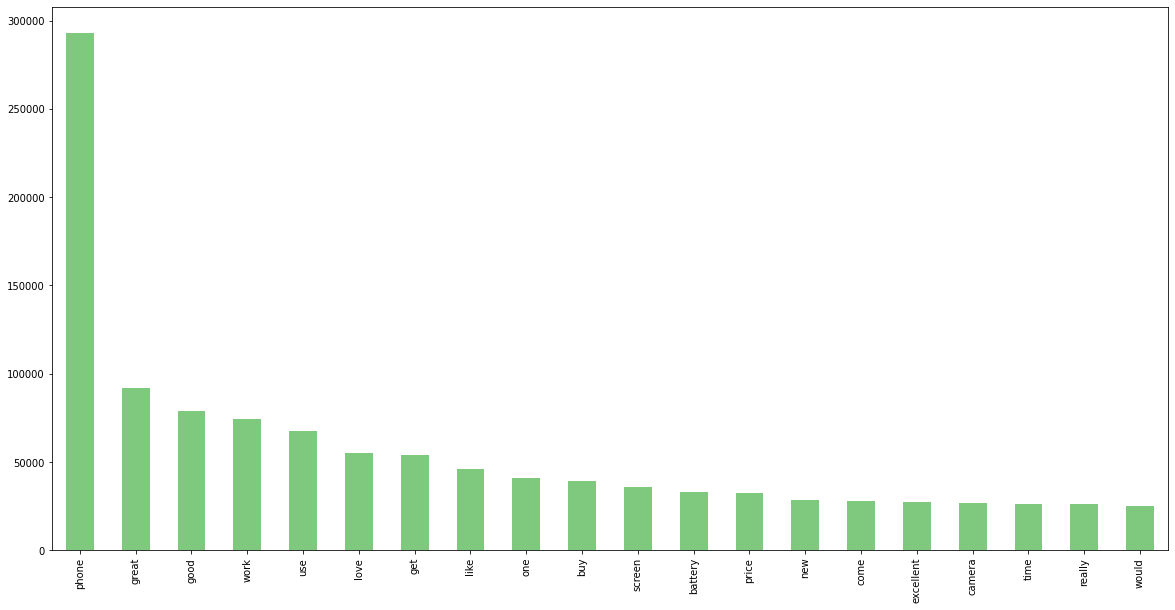

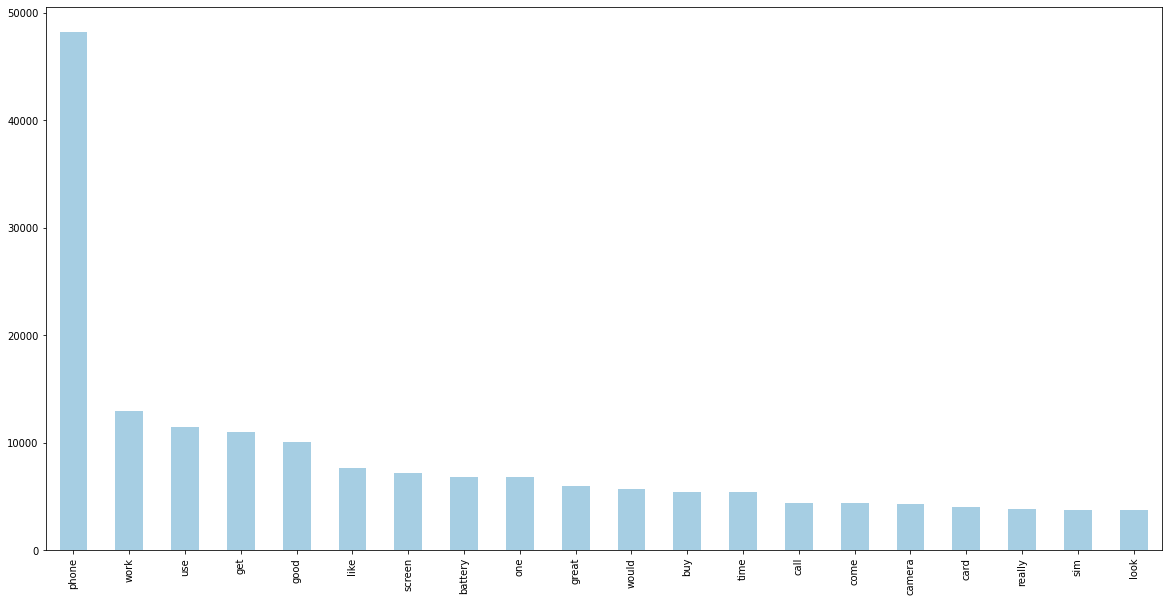

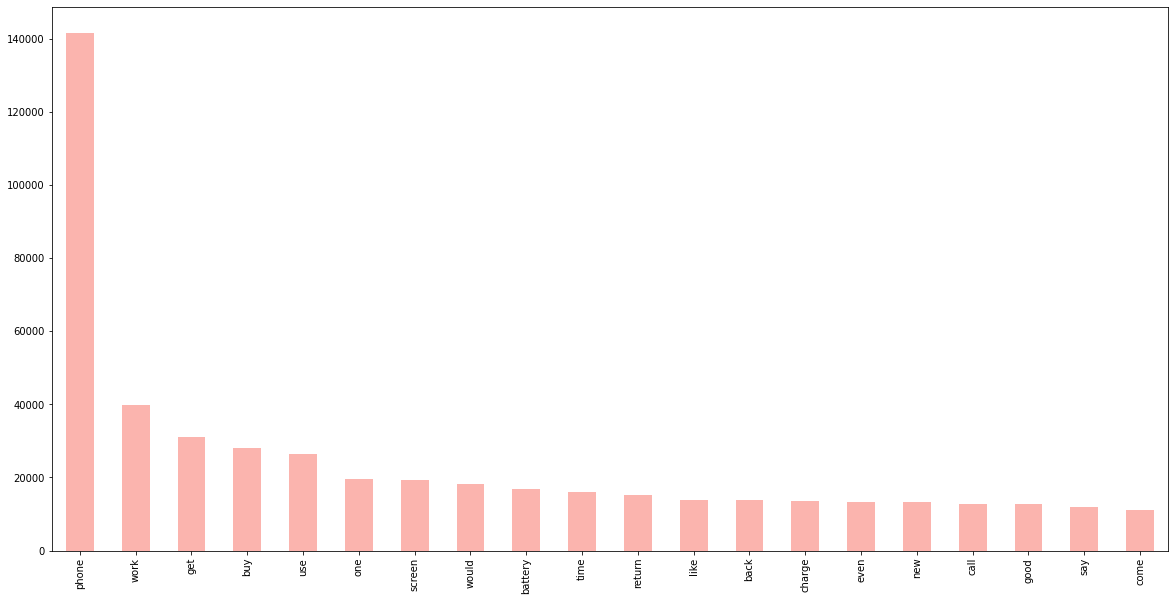

In [89]:
color = ['Accent', 'Paired', 'Pastel1']
splitedData = [Positive, Neutral, Negative]

for item in range(3):
  plt.figure(figsize=(20,10))
  pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind='bar', colormap=color[item])
  plt.show()

Observation: from the above bar chart, the word ‘phone’ is a common term in all three categories. So if we remove ‘phone’ from the corpus, the following analysis can have better performance.

Below, we define a function below to remove a particular word from the dataset

In [90]:
def word_remove(text, word='phone'):
  return ' '.join([i for i in text.split() if i != word])


print(' Before remove phone ......\n')
print(Positive.head(5))

# remove the word 'phone', you can also try on the Neutral and the Negative data
Positive = Positive.apply(word_remove)

print('\n After remove phone ......\n')
print(Positive.head(5))

 Before remove phone ......

0    feel lucky find use phone use hard phone line ...
1    nice phone nice grade pantach revue clean set ...
2                                               please
3             work good slow sometimes good phone love
4    great phone replace lose phone thing volume bu...
Name: CleanReview, dtype: object

 After remove phone ......

0    feel lucky find use use hard line someone upgr...
1    nice nice grade pantach revue clean set easy s...
2                                               please
3                   work good slow sometimes good love
4    great replace lose thing volume button work st...
Name: CleanReview, dtype: object
